## Table of Contents
* [Import and Basic EDA](#import)
* [Correlation of numerical features](#corr_num)
* ["Correlation" of all features](#corr_all)
* [Impact of age feature](#age)
* [Target vs Features](#target)

In [2]:
# packages

# Importing the sandard libraries.
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
import phik

In [3]:
# show files
!ls -l '../input/playground-series-s3e2/'

total 1840
-rw-r--r-- 1 nobody nogroup 275518 Jan 10 00:23 sample_submission.csv
-rw-r--r-- 1 nobody nogroup 634461 Jan 10 00:23 test.csv
-rw-r--r-- 1 nobody nogroup 969639 Jan 10 00:23 train.csv


<a id='import'></a>
# Import and Basic EDA

In [4]:
# import and overview
df_train = pd.read_csv('../input/playground-series-s3e2/train.csv')
df_test = pd.read_csv('../input/playground-series-s3e2/test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [7]:
# test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  object 
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  object 
 6   work_type          10204 non-null  object 
 7   Residence_type     10204 non-null  object 
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 877.0+ KB


In [8]:
# preview
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [9]:
# feature definition # Actually what we have done is the separation of the category feature and the numerical features.
features_num = ['age', 'avg_glucose_level', 'bmi']

features_cat = ['gender', 'hypertension', 'heart_disease', 
                'ever_married', 'work_type', 'Residence_type',
                'smoking_status']

features = features_num + features_cat

target = 'stroke'

In [13]:
#We can find the basic statistics becuse the dataframe is in the numerical form.,
#df_train[features_num].describe().T
df_train[features_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,15304.0,41.417708,21.444673,0.08,26.0,43.00,57.00,82.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.5,27.60,32.00,80.1


In [14]:
# basic stats - test
df_test[features_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,10204.0,41.920713,21.097956,0.08,26.00,43.50,57.00,82.0
avg_glucose_level,10204.0,89.197766,25.914364,55.12,75.06,85.07,96.75,267.6
bmi,10204.0,28.242351,6.733863,11.50,23.70,27.70,32.00,97.6


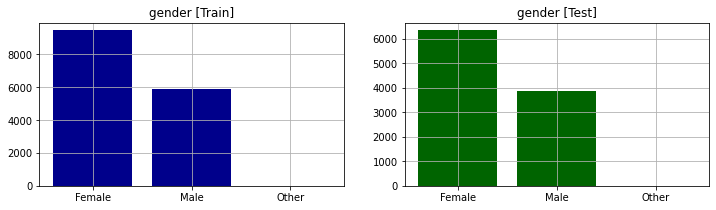

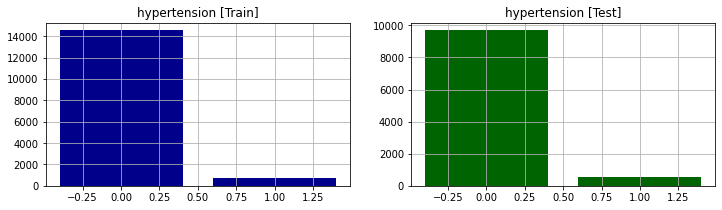

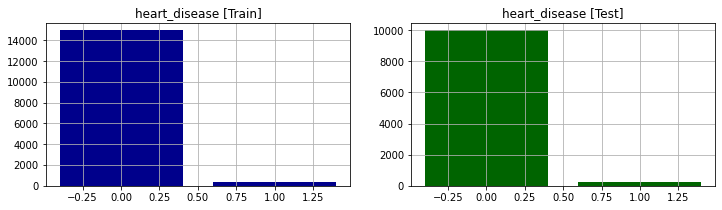

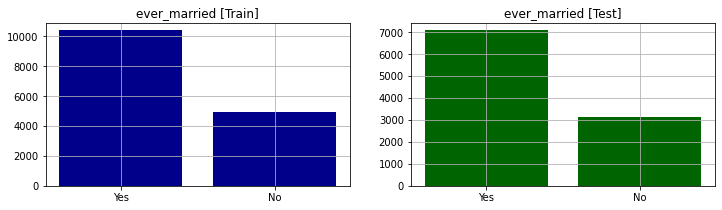

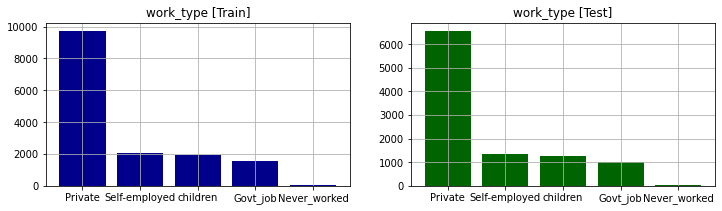

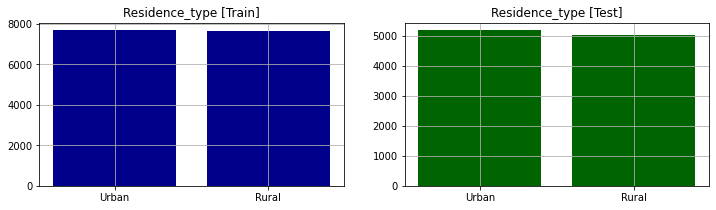

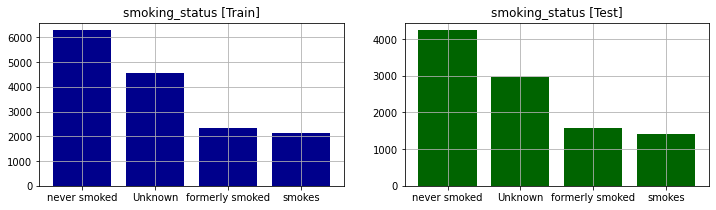

In [15]:
# show distribution of categorical features
#The function of the for loop is to the check the features in the dataframe and do the necessary.
#Shows the possibility of drawing ufing the fot loops.
for f in features_cat:
    plt.figure(figsize=(12,3))
    ax1 = plt.subplot(1,2,1)
    foo = df_train[f].value_counts()
    ax1.bar(height=foo, x=foo.index, color='darkblue')
    plt.title(f + ' [Train]')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    foo = df_test[f].value_counts()
    ax2.bar(height=foo, x=foo.index, color='darkgreen')
    plt.title(f + ' [Test]')
    plt.grid()
    plt.show()

#### Distributions of numerical features will be shown in the following pairplots.

<a id='corr_num'></a>
# Correlation of numerical features

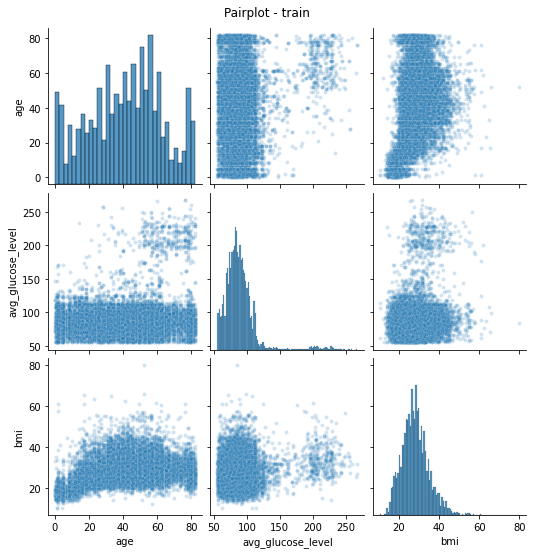

In [16]:
# pairplot of numerical features - train
g = sns.pairplot(data=df_train[features_num], 
                 plot_kws = {'alpha': 0.2, 's' : 15})
g.fig.suptitle('Pairplot - train', y=1.02)
plt.show()

In [ ]:
# pairplot of numerical features - train
# including visualization of target via color
g = sns.pairplot(data=df_train[features_num+[target]],
                 hue = target,
                 plot_kws = {'alpha': 0.2, 's' : 15})
g.fig.suptitle('Pairplot - train - colored by target', y=1.02)
plt.show()

In [ ]:
# calc correlation matrix - train
rho_mat_train = df_train[features_num].corr(method='pearson')
# and visualize
plt.figure(figsize=(5,4))
sns.heatmap(rho_mat_train, annot=True,
            fmt='.3f',
            linecolor='black', linewidths=1,
            cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Correlation Numerical Features - Train')
plt.show()

In [ ]:
# pairplot of numerical features - test
g = sns.pairplot(data=df_test[features_num], 
                 plot_kws = {'alpha': 0.2, 's' : 15})
g.fig.suptitle('Pairplot - test', y=1.02)
plt.show()

In [ ]:
# calc correlation matrix - test
rho_mat_test = df_test[features_num].corr(method='pearson')
# and visualize
plt.figure(figsize=(5,4))
sns.heatmap(rho_mat_test, annot=True,
            fmt='.3f',
            linecolor='black', linewidths=1,
            cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Correlation Numerical Features - Test')
plt.show()

<a id='corr_all'></a>
# "Correlation" of all features
### Using the Phi_K coefficient we can also check connections between categorical and numerical features (see https://phik.readthedocs.io/en/latest/)

In [ ]:
# calc Phi_K matrix
phiK_mat_train = df_train[features].phik_matrix(interval_cols=features_num)

In [ ]:
# visualize phi_K matrix
plt.figure(figsize=(9,7))
sns.heatmap(phiK_mat_train, annot=True,
            fmt='.3f',
            linecolor='black', linewidths=1,
            cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Phi_K correlation - Train')
plt.show()

In [ ]:
# calc Phi_K matrix
phiK_mat_test = df_test[features].phik_matrix(interval_cols=features_num)
# and visualize phi_K matrix
plt.figure(figsize=(9,7))
sns.heatmap(phiK_mat_test, annot=True,
            fmt='.3f', 
            linecolor='black', linewidths=1,
            cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Phi_K correlation - Test')
plt.show()

### 💡 We observe that especially age has some strong connections with other features. In particular the connection between age and ever_married is discussed here: https://www.kaggle.com/competitions/playground-series-s3e2/discussion/377253

<a id='age'></a>
# Impact of age feature on other features

### Let's evaluate the impact of age by introducing a binned version:

In [ ]:
# first, create a discrete version of age
df_train['age_cat'] = pd.cut(df_train.age, [0,10,20,30,40,50,60,70,80,90])
plt.figure(figsize=(10,4))
df_train.age_cat.value_counts().sort_index().plot(kind='bar', color='darkblue')
plt.title('Binned version of age')
plt.grid()
plt.show()

In [ ]:
# plot bivariate distributions between age and categorical features;
# we normalize each age column here
for f in features_cat:
    # calc cross table
    ctab = pd.crosstab(df_train[f],df_train.age_cat)
    # ...and normalized by column
    ctab_norm = ctab / ctab.sum()
    # plot as heatmap
    plt.figure(figsize=(10,3))
    g = sns.heatmap(ctab_norm, annot=True,
                    fmt='.2%', linecolor='black',
                    linewidths=1,
                    cmap='Greens', 
                    vmin=0, vmax=+1)
    plt.title(f + ' vs age(cat) - train')
    plt.show()

In [ ]:
# plot also numerical features vs age groups
for f in features_num:
    if f != 'age':
        plt.figure(figsize=(10,5))
        sns.violinplot(data=df_train, x='age_cat', y=f)
        plt.title(f + ' vs age(cat) - train')
        plt.grid()
        plt.show()

### A different visualization approach without binning of age:

In [ ]:
# create violinplots for all categorical features
for f in features_cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_train, y=f, x='age',
                   orient='h')
    plt.title(f + ' vs age - train')
    plt.xlabel('age')
    plt.grid()
    plt.show()

<a id='target'></a>
# Target vs Features

### We can easily extend the Phi_K evaluation to also include our **target**:

In [ ]:
# calc
phiK_mat_w_target = df_train[features+[target]].phik_matrix(interval_cols=features_num)
# reduce to relavant data only
phiK_target = phiK_mat_w_target[target] # extract "stroke" column only
phiK_target = pd.DataFrame(phiK_target[phiK_target.index!=target]) # remove "stroke" row
# and visualize
plt.figure(figsize=(2,5))
sns.heatmap(pd.DataFrame(phiK_target), annot=True,
            fmt='.3f', 
            linecolor='black', linewidths=1,
            cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Phi_K correlation - Target vs Features')
plt.show()

### 💡 As expected, age has the highest "correlation" here. On the other end we can expect gender and Residence_type to have only a small impact on the stroke prediction. Let's visualize the connections in the following:

### Target vs **Categorical** Features (incl. age_cat):

In [ ]:
for f in (['age_cat'] + features_cat):
    ctab = pd.crosstab(df_train[target],df_train[f])
    ctab_norm = ctab / ctab.sum()
    # plot as heatmap
    plt.figure(figsize=(10,3))
    g = sns.heatmap(ctab_norm, annot=True,
                    fmt='.2%', linecolor='black',
                    linewidths=1,
                    cmap='Greens', 
                    vmin=0, vmax=+1)
    plt.title('Target vs '+f)
    plt.show()

### Target vs **Numerical** Features:

In [ ]:
# plot also numerical features vs age groups
for f in features_num:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_train, y=target, x=f,
                   orient='h')
    plt.title('target vs ' + f)
    plt.xlabel(f)
    plt.grid()
    plt.show()